# Рубежный контроль №1. Тема: Технологии разведочного анализа и обработки данных.

Выполнил:

студент группы РТ5-61Б Незаметдинов Тимур

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.impute import SimpleImputer

## Загрузка данных

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

В загруженном датасете 89 колонок и 18207 строк. В колонках хранятся данные различного типа. В данных имеются пропуски, оценим их количество:

In [5]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        print(column,': ', data[column].isna().sum(), data[column].dtype)

Club :  241 object
Preferred Foot :  48 object
International Reputation :  48 float64
Weak Foot :  48 float64
Skill Moves :  48 float64
Work Rate :  48 object
Body Type :  48 object
Real Face :  48 object
Position :  60 object
Jersey Number :  60 float64
Joined :  1553 object
Loaned From :  16943 object
Contract Valid Until :  289 object
Height :  48 object
Weight :  48 object
LS :  2085 object
ST :  2085 object
RS :  2085 object
LW :  2085 object
LF :  2085 object
CF :  2085 object
RF :  2085 object
RW :  2085 object
LAM :  2085 object
CAM :  2085 object
RAM :  2085 object
LM :  2085 object
LCM :  2085 object
CM :  2085 object
RCM :  2085 object
RM :  2085 object
LWB :  2085 object
LDM :  2085 object
CDM :  2085 object
RDM :  2085 object
RWB :  2085 object
LB :  2085 object
LCB :  2085 object
CB :  2085 object
RCB :  2085 object
RB :  2085 object
Crossing :  48 float64
Finishing :  48 float64
HeadingAccuracy :  48 float64
ShortPassing :  48 float64
Volleys :  48 float64
Dribbling :  4

Согласно полученному заданию, необходимы выполнить обработку пропусков в данных для одного категориального и одного количественного признака. Выберем для этого категориальную колонку `Club`, и количественную `Weak Foot`.

## Обработка пропусков

### Обработка пропусков в категориальных столбцах

Посмотрим на уникальные значения столбца `Club`

In [6]:
data['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

Для заполнения пропусков используем SimpleImputer из библиотки sklearn. Для заполнения применим стратегию most_frequent, которая заменит NaN значения наиболее часто встречающимся в данной колонке.

In [7]:
#Выбираем нужную нам колонку
cat_temp_data = data[['Club']]

# Создаем объект класса SimpleImputer, устанавливаем тип пропущенных значений и стратегию импьютирования
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_temp_data = imp2.fit_transform(cat_temp_data)

# преобразование полученного массива значений обратно в столбец датафрейма
my_list = map(lambda x: x[0], cat_temp_data)
data['Club'] = pd.Series(my_list)

#Дополнительная проверка результата работы
data['Club'].isna().sum()

0

Пропуски в выбраном категориальном столбце устранены

### Обработка пропусков в числовых столбцах

Посмотрим на уникальные значения столбца `Weak Foot`

In [8]:
data['Weak Foot'].unique()

array([ 4.,  5.,  3.,  2.,  1., nan])

Построим гистограмму распределения значений в выбранном нами столбце

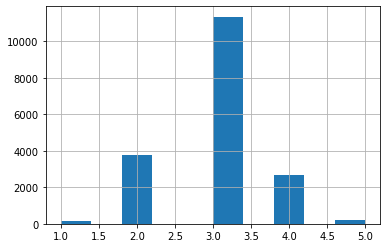

In [9]:
data['Weak Foot'].hist()

Для замены воспользуемся средствами библиотеки pandas и заполним пропуски средним значением по данной колонке, поскольку выбросов(аномально больших или малых значений) нет, то данный способ уместен.

In [10]:
data['Weak Foot'] =  data['Weak Foot'].fillna(data['Weak Foot'].mean())

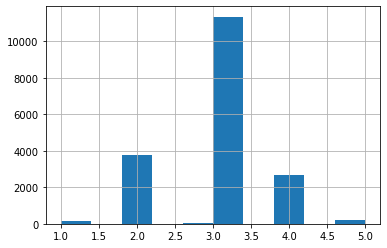

In [11]:
data['Weak Foot'].hist()

In [12]:
data['Weak Foot'].isna().sum()

0

Пропуски в выбраном количественном столбце устранены

## Ответы на контрольные вопросы:

- Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Для решения задачи регрессии и предсказания параметра `Overall`, т.е. для предсказания рейтинга карточки игрока, формирующегося на основе остальных его характеристик можно применить:
* Линейную регрессию - т.к. зависимость между количетсвенными признаками и итоговым рейтингои прямопропорциональная, поэтому даже такой несложный метод может хорошо справиться с задачей
* Метод опорных векторов - в данных исключены выбросы из-за того, что они уже стандартизированы в рамках рейтинговой системы, в которых их выставляют, также это достаточно сложный метод, который может справиться и в случае нелинейной зависимости целевого признака от параметров.